# 导入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

# 导入数据

In [2]:
dataD=pd.read_csv(r"./data/2_train.csv"
                  ,header=0,
                  sep=';')
dataD.head(6)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,-,housemaid,married,basic.4y,.,no,?,telephone,may,...,-,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,NaN,no,no,telephone,may,...,1,999,0,?,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,NaN,high.school,no,?,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,?,may,...,1,999,?,NaN,1.1,93.994,-36.4,4.857,5191.0,no
5,6,45,services,NaN,-,NaN,?,?,telephone,may,...,1,999,NaN,?,1.1,93.994,-36.4,4.857,5191.0,no


# 检查数据中的非法值

In [3]:
dataD.iloc[:,1].value_counts()

-     2590
.     1954
31    1465
?     1453
33    1387
      ... 
89       2
94       1
95       1
98       1
87       1
Name: age, Length: 81, dtype: int64

# 替换非法值为缺失

In [4]:
for i in ['-','.','?',np.nan]:
    dataD.replace(i,np.nan,inplace=True)

# 取值有序编码

In [6]:
import category_encoders as ce

ordialE=ce.OrdinalEncoder(cols=['job','marital', 'education',
                                'default', 'housing', 'loan',
                                'contact', 'month', 'day_of_week',
                                'poutcome', 'y'],
                          handle_missing='return_nan')
dataM=ordialE.fit_transform(dataD)
dataM.shape

(41188, 22)

# 缺失值可视化

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


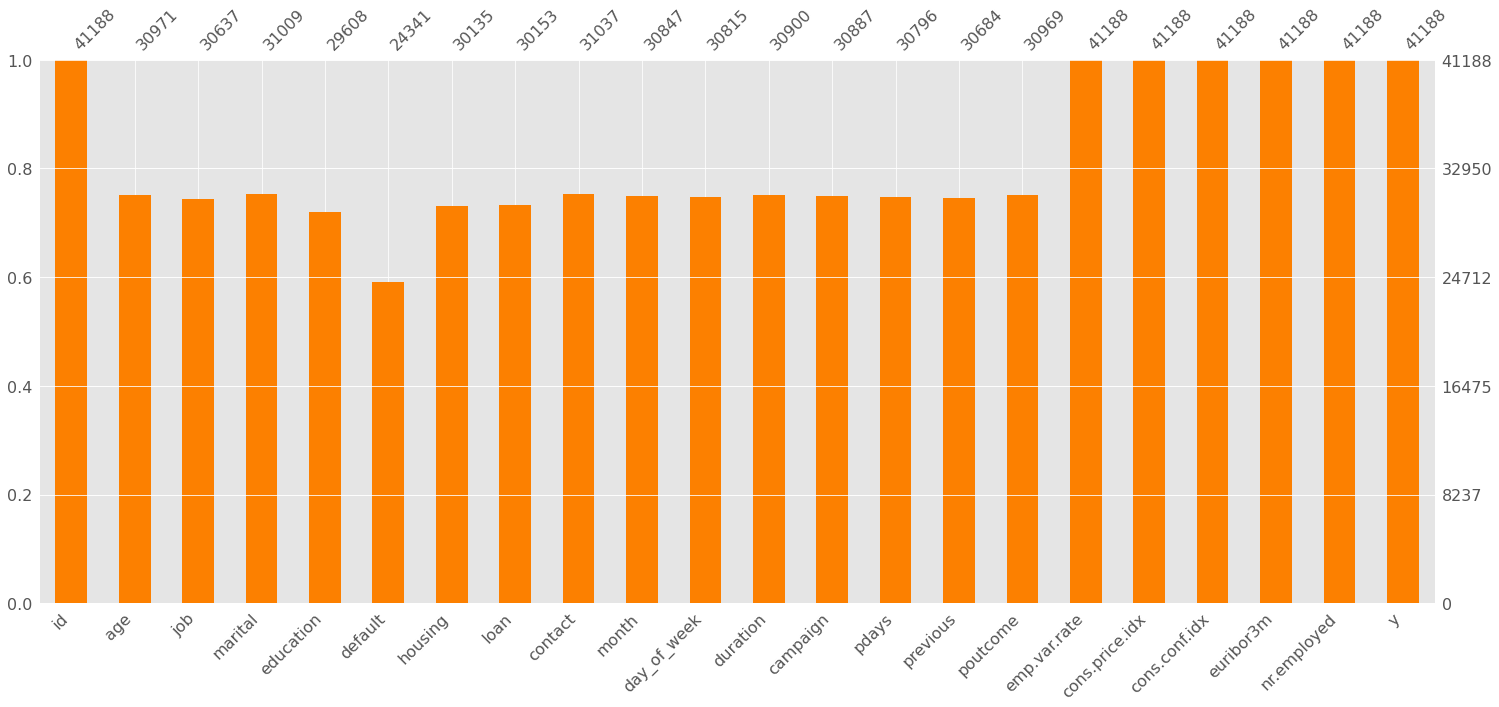

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


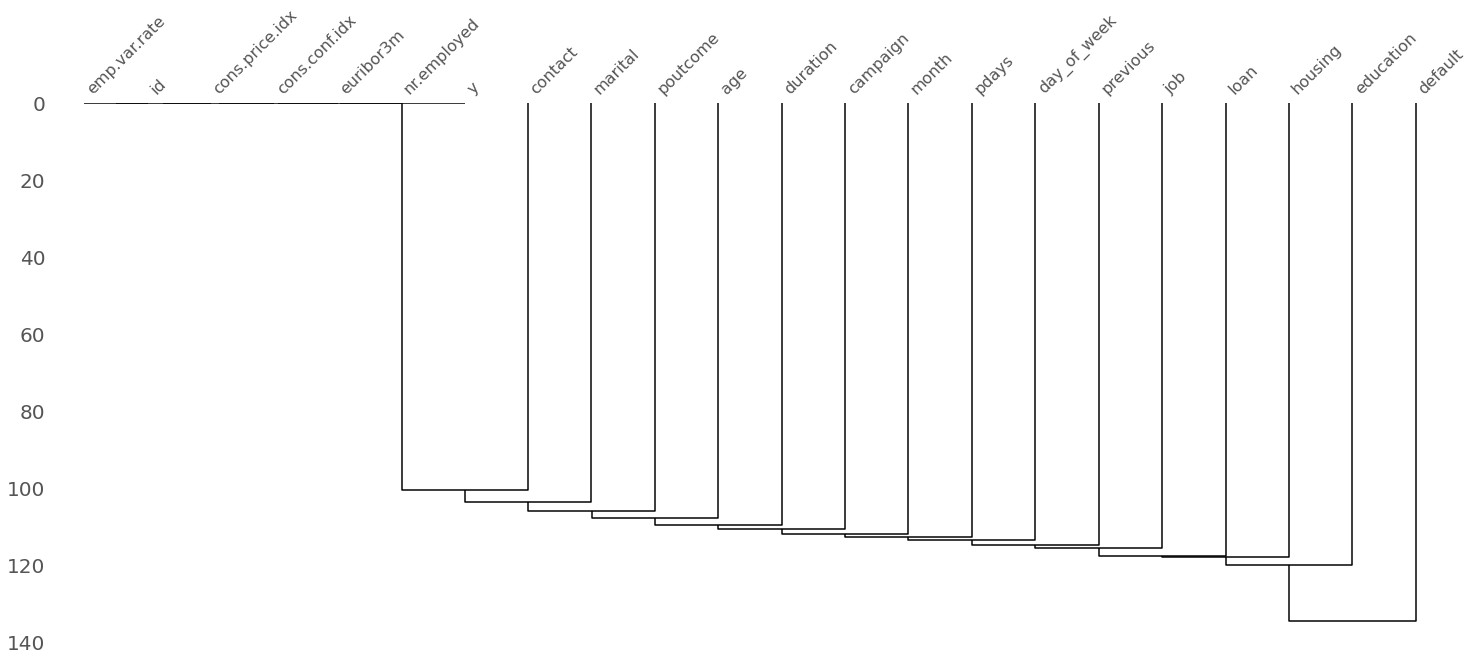

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


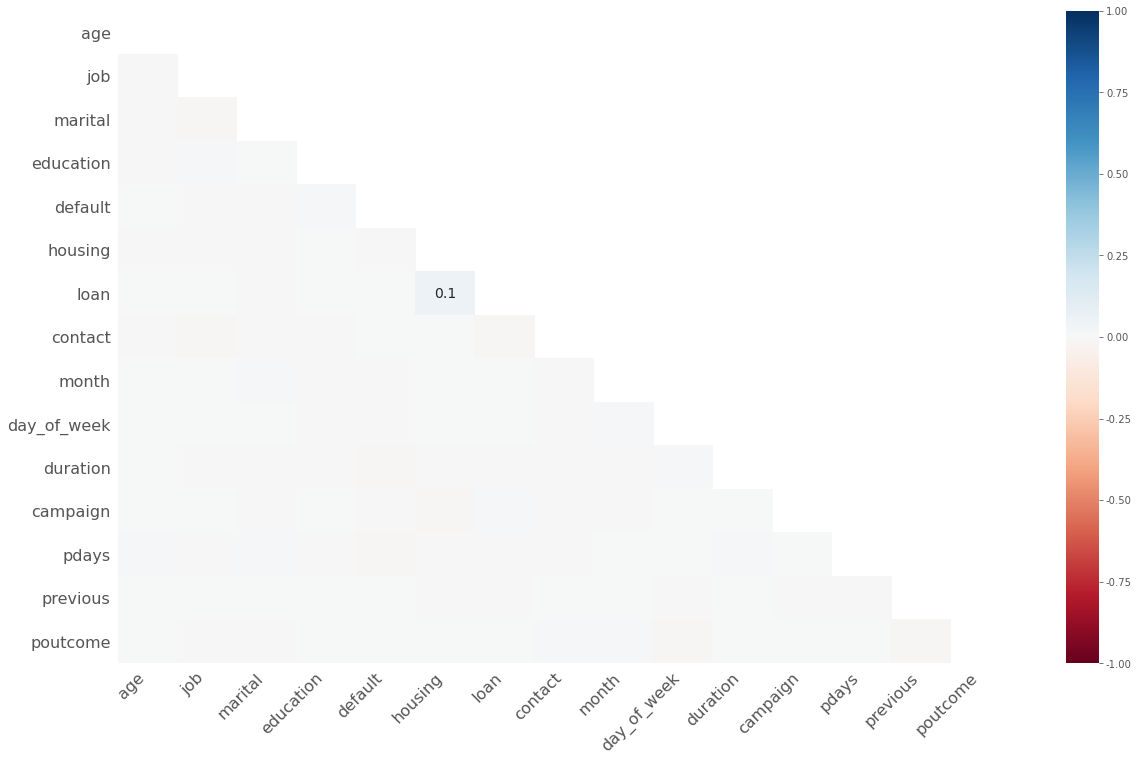

In [7]:
import missingno
missingno.bar(dataM,color=(0.99,0.5,0)) ;
missingno.dendrogram(dataM);            #缺失值变量的聚类
missingno.heatmap(dataM);

# 填补缺失

In [8]:
dataMM=dataM.fillna(value=dataM.median())#中位数填补
dataMM.describe()

,id,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,4.686608,1.675998,4.644265,2.000049,2.322812,2.114232,2.445712,3.940711,3.986040,1.230237,0.081886,93.575664,-40.502600,3.621291,5167.035911,1.112654
std,11890.09578,2.470909,1.070569,1.953124,0.006968,0.946474,0.318097,0.895187,2.391386,1.222646,0.694883,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000
25%,10297.75000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000
50%,20594.50000,4.000000,1.000000,5.000000,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,1.000000
75%,30891.25000,5.000000,3.000000,6.000000,2.000000,3.000000,2.000000,3.000000,5.000000,5.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,1.000000
max,41188.00000,12.000000,4.000000,8.000000,3.000000,3.000000,3.000000,3.000000,11.000000,6.000000,4.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2.000000


# 数据描述

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


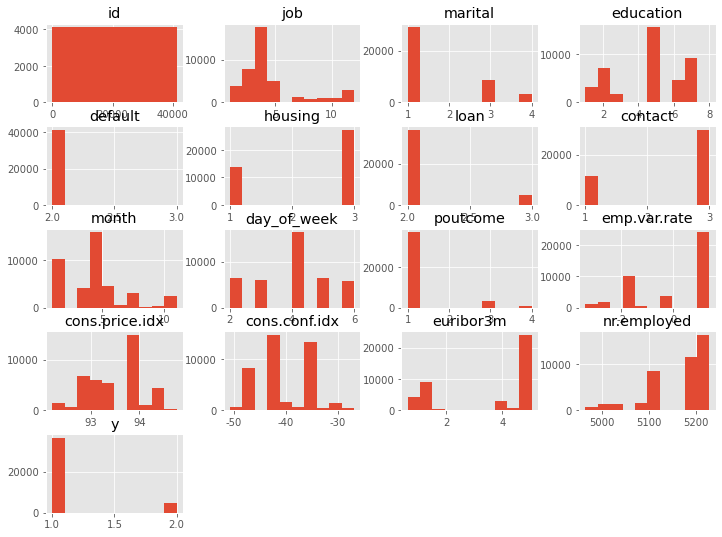

In [9]:
dataMM.hist(figsize=(12,9));

# 相关性判断

<AxesSubplot:>

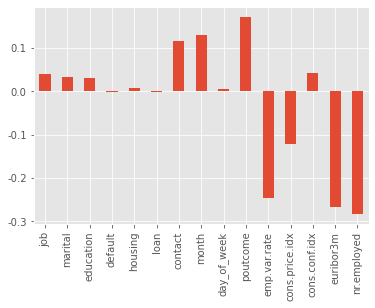

In [10]:
dataMM.iloc[:,[*range(1,21)]].corrwith(dataMM['y'],method='spearman').plot.bar()

# 数据分区

In [11]:
x,y=dataMM.iloc[:,[*range(1,5),*range(6,21)]],dataMM.iloc[:,-1]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)

# 构建模型评估

===模型： MLPClassifier(hidden_layer_sizes=(5, 5))
              precision    recall  f1-score   support

         不接受       0.90      0.99      0.94      7298
          接受       0.65      0.14      0.23       940

    accuracy                           0.89      8238
   macro avg       0.78      0.57      0.59      8238
weighted avg       0.87      0.89      0.86      8238



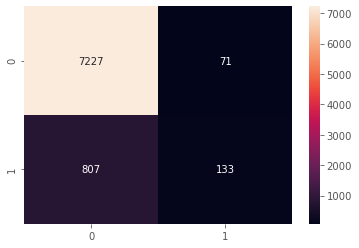

===模型： SVC(C=1)
              precision    recall  f1-score   support

         不接受       0.90      0.99      0.94      7298
          接受       0.66      0.15      0.24       940

    accuracy                           0.89      8238
   macro avg       0.78      0.57      0.59      8238
weighted avg       0.87      0.89      0.86      8238



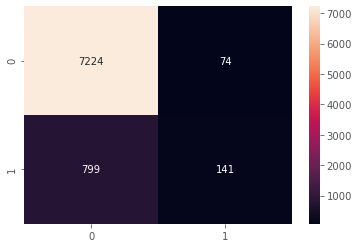

===模型： GradientBoostingClassifier(n_estimators=10)
              precision    recall  f1-score   support

         不接受       0.90      1.00      0.94      7298
          接受       0.78      0.11      0.20       940

    accuracy                           0.90      8238
   macro avg       0.84      0.55      0.57      8238
weighted avg       0.88      0.90      0.86      8238



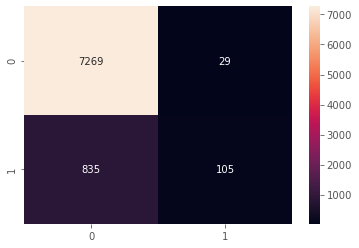

In [13]:
from sklearn.metrics import confusion_matrix,classification_report   #混淆矩阵和分类评估
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

mlp_clf=MLPClassifier(hidden_layer_sizes=(5,5))
svc_clf=SVC(C=1)
gb_clf=GradientBoostingClassifier(n_estimators=10)
xgb_clf = GradientBoostingClassifier(max_depth=3,learning_rate=0.1,n_estimators=10)

for i in [mlp_clf,svc_clf,gb_clf]:
    i.fit(xtrain,ytrain)           
    y_pre=i.predict(xtest)
    print('===模型：',i)
    print(classification_report(ytest,y_pre,target_names=['不接受','接受']))
    sns.heatmap(confusion_matrix(ytest,y_pre),fmt="d",annot=True)
    plt.show()